In [1]:
import spacy

In [2]:
from transformers import pipeline, logging

In [3]:
nlp = spacy.load("en_core_web_sm")

In [10]:
text = "Remind me to call Surbhi at 10 AM tomorrow"

In [11]:
doc = nlp(text)

In [ ]:
# Token, POS, Lemmatization, dependency parsing

In [12]:
for token in doc:
  print(f"{token.text:<10} {token.lemma_:<10} {token.pos_:<10} {token.dep_}")

Remind     remind     VERB       ROOT
me         I          PRON       dobj
to         to         PART       aux
call       call       VERB       xcomp
Surbhi     Surbhi     PROPN      dobj
at         at         ADP        prep
10         10         NUM        nummod
AM         am         NOUN       pobj
tomorrow   tomorrow   NOUN       npadvmod


In [ ]:
# NER

In [13]:
for ent in doc.ents:
  print(f"{ent.text:<10} {ent.label_}")

Surbhi     WORK_OF_ART
10 AM      TIME
tomorrow   DATE


In [ ]:
#intent classification

In [14]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [15]:
labels = ["SetReminder", "CancelReminder", "WeatherQuery"]

In [16]:
results = classifier(text,labels)

In [19]:
for label,score in zip(results['labels'],results['scores']):
  print(f"{label:<10} {score}")

SetReminder 0.7837260365486145
WeatherQuery 0.16945350170135498
CancelReminder 0.046820443123579025


In [5]:
from transformers import pipeline, logging
summarizer = pipeline('summarization', model='facebook/bart-large-cnn')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [11]:
text = "Whispering clouds drifted across the violet sky as lanterns rose above the quiet harbor. Children laughed, chasing reflections on the water’s edge. Old fishermen shared stories of distant storms, while music echoed softly between the wooden piers. The scent of salt and jasmine lingered, promising dreams beyond tomorrow’s horizon."

In [12]:
summary = summarizer(text, max_length=45, min_length=20,do_sample=False)

In [13]:
summary[0]['summary_text']

'Whispering clouds drifted across the violet sky as lanterns rose above the quiet harbor. Children laughed, chasing reflections on the water’s edge. Old fishermen shared stories of distant storms.'

In [ ]:
# Single and Multihead attention

In [1]:
from transformers import AutoTokenizer, AutoModel

In [2]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [7]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# if output_attentions=False next layer receives previous later output embeddings but not attention weights
model = AutoModel.from_pretrained("bert-base-uncased", output_attentions=True)

In [8]:
sentence = "he works at apple and eats apple everyday"

In [20]:
# returns pytorch tensors, tensorflow tensors are deprecated
import tensorflow as tf
inputs = tokenizer(sentence, return_tensors="pt")

In [21]:
# run model, get attention weights
outputs = model(**inputs)

In [23]:
atentions = outputs.attentions

In [25]:
last_layer_attention = atentions[-1]

In [29]:
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

In [38]:
# (batch_size, num_heads, seq_len, seq_len)
# seq_len is number of tokens in a sentence
# ["[CLS]", "the", "cat", "sat", "on", "the", "mat", ".", "[SEP]"]
# cls is start of sentence token, classification
# sep is seperation token, at the end of sentence

heads = last_layer_attention.shape[1]

In [39]:
head0 = last_layer_attention[0,0].detach().numpy()

In [49]:
avg_attention = last_layer_attention[0].mean(dim=0).detach().numpy()

In [43]:
cleanedTokens = tokens[1:-1]

In [47]:
cleanedhead0 = head0[1:-1, 1:-1]

In [50]:
cleanedavgatt = avg_attention[1:-1, 1:-1]

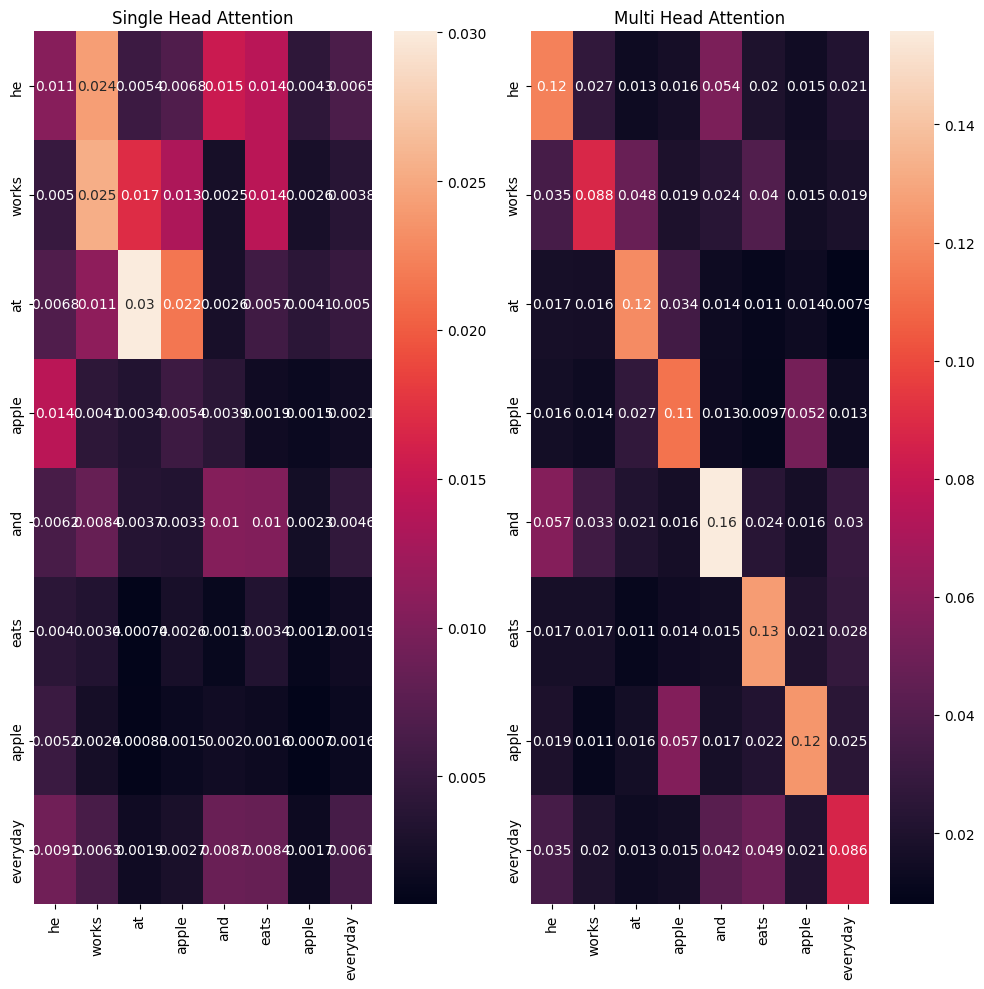

In [58]:
fix, axes = plt.subplots(1,2, figsize=(10, 10))

#heat map for single head
sns.heatmap(cleanedhead0, annot=True, ax=axes[0], xticklabels=cleanedTokens, yticklabels=cleanedTokens)
axes[0].set_title("Single Head Attention")

# heatmap for average attention
sns.heatmap(cleanedavgatt, annot=True, ax=axes[1], xticklabels=cleanedTokens, yticklabels=cleanedTokens)
axes[1].set_title("Multi Head Attention")

plt.tight_layout()
plt.show()

In [1]:
from transformers import pipeline, logging

In [2]:
translator = pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


In [3]:
text = "He works at apple and eats an apple everyday"

In [4]:
translatedText = translator(text, max_length=50)

In [5]:
translatedText

[{'translation_text': 'Il travaille à la pomme et mange une pomme tous les jours.'}]

In [20]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
text = "Hello, world!"
encoding = tokenizer(text)

print(encoding['input_ids'])


[101, 7592, 1010, 2088, 999, 102]


In [21]:
# Sentiment Analysis

In [1]:
import pandas as pd

In [2]:
test_df = pd.read_csv("/content/Test.csv")
train_df = pd.read_csv("/content/Train.csv")

In [3]:
train_df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
train_df['label'].value_counts()

,count
label,
0,260
1,240


In [3]:
import re
def clean(text):
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'http\S+|www\S+', '', text)
  text = re.sub(r'[^A-Za-z0-9\s]', '', text)
  text = re.sub(r'\s+', '', text).strip()
  return text

In [4]:
train_df['clean_text'] = train_df['text'].apply(clean)
test_df['clean_text'] = test_df['text'].apply(clean)

In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [6]:
train_texts = train_df['clean_text'].tolist()
train_labels = train_df['label'].tolist()

test_texts = test_df['clean_text'].tolist()
test_labels = test_df['label'].tolist()

In [7]:
preprocess_url = "https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3"
encoder_url = "https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/bert-en-uncased-l-10-h-128-a-2/2"

In [8]:
# preprocess - tokenize inputs
# encoder - encoder layer
preprocess = hub.KerasLayer(preprocess_url)
encoder = hub.KerasLayer(encoder_url, trainable=True)

In [9]:
import tensorflow_text as text
preprocessor_model = hub.KerasLayer(
    "https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3")

bert_model = hub.KerasLayer(
    "https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/bert-en-uncased-l-10-h-128-a-2/2",
    trainable=True)

class Preprocess_Layer(tf.keras.layers.Layer):
    def call(self, inputs):
        return preprocessor_model(inputs)

class Bert_Embedding_Layer(tf.keras.layers.Layer):
    def call(self, inputs):
        return bert_model(inputs)


text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
encoder_inputs = Preprocess_Layer()(text_input)
outputs = Bert_Embedding_Layer()(encoder_inputs)
# For the fine-tuning you are going to use the pooled_output array.
net = outputs['pooled_output']
net = tf.keras.layers.Dropout(0.1)(net)
net = tf.keras.layers.Dense(1, activation="sigmoid", name='classifier')(net)
model_3 = tf.keras.Model(text_input, net)
model_3.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text (InputLayer)   │ (None)            │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ preprocess__layer   │ [(None, 128),     │          0 │ text[0][0]        │
│ (Preprocess_Layer)  │ (None, 128),      │            │                   │
│                     │ (None, 128)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert__embedding__l… │ [(None, 128),     │          0 │ preprocess__laye… │
│ (Bert_Embedding_La… │ (None, 128, 128), │            │ preprocess__laye… │
│                     │ (None, 128, 128), │            │ preprocess__laye… │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128),      │            │                   │
│                     │ (None, 128, 128)] │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ bert__embedding_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classifier (Dense)  │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(3e-5),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [11]:
batch_size = 8

train_ds = tf.data.Dataset.from_tensor_slices((train_texts, train_labels)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((test_texts, test_labels)).batch(batch_size)

history = model_3.fit(train_ds, validation_data=test_ds, epochs=3)

Epoch 1/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 291ms/step - accuracy: 0.4666 - loss: 0.7142 - val_accuracy: 0.5667 - val_loss: 0.6878
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 355ms/step - accuracy: 0.5178 - loss: 0.7088 - val_accuracy: 0.5667 - val_loss: 0.6882
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step - accuracy: 0.5584 - loss: 0.6882 - val_accuracy: 0.5667 - val_loss: 0.6885


In [14]:
loss, acc = model_3.evaluate(test_ds)
print("Test accuracy:", acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 343ms/step - accuracy: 0.5781 - loss: 0.6875
Test accuracy: 0.5666666626930237


In [16]:

example = ["This product is fantastic!"]
sample_text_tensor = tf.constant(example)
model_3.predict(sample_text_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[0.54273546]], dtype=float32)